### Import your libraries

In [91]:
import pandas as pd 
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

### Load your dataset

In [92]:
df =pd.read_csv('HR_Missing_Vslues.csv')
df

,Employee_Name,EmpID,Salary,PositionID,Position,DOB,Sex,MaritalDesc,RaceDesc,DateofHire,DateofTermination,Department,ManagerName,ManagerID,RecruitmentSource,Absences
0,"Adinolfi, Wilson K",10026,62506.0,19,Production Technician I,07/10/83,M,Single,White,7/5/2011,NaN,Production,Michael Albert,22.0,LinkedIn,1.0
1,"Ait Sidi, Karthikeyan",10084,104437.0,27,Sr. DBA,05/05/75,M,Married,White,3/30/2015,6/16/2016,IT/IS,Simon Roup,4.0,Indeed,17.0
2,"Akinkuolie, Sarah",10196,64955.0,20,Production Technician II,09/19/88,F,Married,White,7/5/2011,9/24/2012,Production,Kissy Sullivan,20.0,LinkedIn,3.0
3,"Alagbe,Trina",10088,64991.0,19,Production Technician I,NaN,F,Married,White,1/7/2008,NaN,Production,Elijiah Gray,16.0,Indeed,15.0
4,NaN,10069,50825.0,19,Production Technician I,09/08/89,F,Divorced,White,7/11/2011,9/6/2016,Production,Webster Butler,39.0,Google Search,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,"Woodson, Jason",10135,65893.0,20,Production Technician II,05/11/85,M,Single,White,7/7/2014,NaN,Production,Kissy Sullivan,20.0,LinkedIn,13.0
307,"Ybarra, Catherine",10301,48513.0,19,Production Technician I,NaN,F,Single,Asian,9/2/2008,9/29/2015,Production,Brannon Miller,12.0,Google Search,4.0
308,NaN,10010,220450.0,6,CIO,NaN,F,Single,White,4/10/2010,NaN,IT/IS,Janet King,2.0,Employee Referral,16.0
309,"Zhou, Julia",10043,89292.0,9,Data Analyst,02/24/79,F,Single,White,3/30/2015,NaN,IT/IS,Simon Roup,4.0,Employee Referral,NaN


### Explore your data 

* First 5 recods
* Last 5 records 
* Check data type
* Show statistical summary 
* Is there any missing values ?
* Applay two more data analysis from your choose 

In [93]:
#to git five record
df.head()

,Employee_Name,EmpID,Salary,PositionID,Position,DOB,Sex,MaritalDesc,RaceDesc,DateofHire,DateofTermination,Department,ManagerName,ManagerID,RecruitmentSource,Absences
0,"Adinolfi, Wilson K",10026,62506.0,19,Production Technician I,07/10/83,M,Single,White,7/5/2011,NaN,Production,Michael Albert,22.0,LinkedIn,1.0
1,"Ait Sidi, Karthikeyan",10084,104437.0,27,Sr. DBA,05/05/75,M,Married,White,3/30/2015,6/16/2016,IT/IS,Simon Roup,4.0,Indeed,17.0
2,"Akinkuolie, Sarah",10196,64955.0,20,Production Technician II,09/19/88,F,Married,White,7/5/2011,9/24/2012,Production,Kissy Sullivan,20.0,LinkedIn,3.0
3,"Alagbe,Trina",10088,64991.0,19,Production Technician I,NaN,F,Married,White,1/7/2008,NaN,Production,Elijiah Gray,16.0,Indeed,15.0
4,NaN,10069,50825.0,19,Production Technician I,09/08/89,F,Divorced,White,7/11/2011,9/6/2016,Production,Webster Butler,39.0,Google Search,2.0


In [94]:
# to get the last five record
df.tail()

,Employee_Name,EmpID,Salary,PositionID,Position,DOB,Sex,MaritalDesc,RaceDesc,DateofHire,DateofTermination,Department,ManagerName,ManagerID,RecruitmentSource,Absences
306,"Woodson, Jason",10135,65893.0,20,Production Technician II,05/11/85,M,Single,White,7/7/2014,NaN,Production,Kissy Sullivan,20.0,LinkedIn,13.0
307,"Ybarra, Catherine",10301,48513.0,19,Production Technician I,NaN,F,Single,Asian,9/2/2008,9/29/2015,Production,Brannon Miller,12.0,Google Search,4.0
308,NaN,10010,220450.0,6,CIO,NaN,F,Single,White,4/10/2010,NaN,IT/IS,Janet King,2.0,Employee Referral,16.0
309,"Zhou, Julia",10043,89292.0,9,Data Analyst,02/24/79,F,Single,White,3/30/2015,NaN,IT/IS,Simon Roup,4.0,Employee Referral,NaN
310,NaN,10271,45046.0,19,Production Technician I,08/17/78,F,Widowed,Asian,9/29/2014,NaN,Production,David Stanley,14.0,LinkedIn,2.0


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Employee_Name      218 non-null    object 
 1   EmpID              311 non-null    int64  
 2   Salary             249 non-null    float64
 3   PositionID         311 non-null    int64  
 4   Position           311 non-null    object 
 5   DOB                280 non-null    object 
 6   Sex                249 non-null    object 
 7   MaritalDesc        311 non-null    object 
 8   RaceDesc           311 non-null    object 
 9   DateofHire         311 non-null    object 
 10  DateofTermination  104 non-null    object 
 11  Department         311 non-null    object 
 12  ManagerName        311 non-null    object 
 13  ManagerID          303 non-null    float64
 14  RecruitmentSource  311 non-null    object 
 15  Absences           280 non-null    float64
dtypes: float64(3), int64(2), o

In [96]:
df.describe()

,EmpID,Salary,PositionID,ManagerID,Absences
count,311.000000,249.000000,311.000000,303.000000,280.000000
mean,10156.000000,67972.662651,16.845659,14.570957,10.128571
std,89.922189,22995.908395,6.223419,8.078306,5.946407
min,10001.000000,45046.000000,1.000000,1.000000,1.000000
25%,10078.500000,55315.000000,18.000000,10.000000,4.750000
50%,10156.000000,62957.000000,19.000000,15.000000,10.000000
75%,10233.500000,71707.000000,20.000000,19.000000,15.250000
max,10311.000000,220450.000000,30.000000,39.000000,20.000000


In [97]:
df.isnull().sum()


Employee_Name         93
EmpID                  0
Salary                62
PositionID             0
Position               0
DOB                   31
Sex                   62
MaritalDesc            0
RaceDesc               0
DateofHire             0
DateofTermination    207
Department             0
ManagerName            0
ManagerID              8
RecruitmentSource      0
Absences              31
dtype: int64

In [98]:
df.columns[df.isnull().any()]


Index(['Employee_Name', 'Salary', 'DOB', 'Sex', 'DateofTermination',
       'ManagerID', 'Absences'],
      dtype='object')

In [105]:
df['Sex'] #keep it


0      M 
1      M 
2       F
3       F
4       F
       ..
306    M 
307     F
308     F
309     F
310     F
Name: Sex, Length: 311, dtype: object

In [102]:
df['Absences'].isna().sum() # check the missing value in (Absences) is 31

31

Text(0.5, 1.0, 'his Absences ')

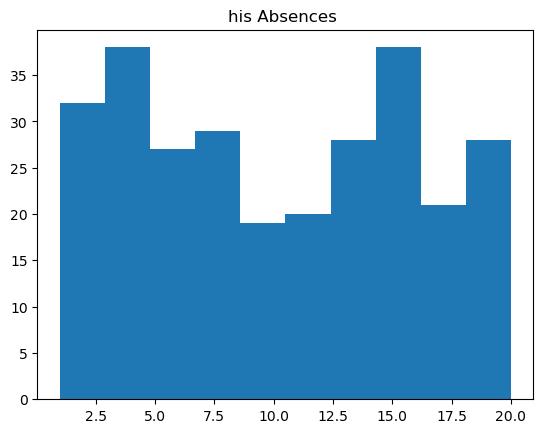

In [122]:
df2=plt.hist(df['Absences']); plt.title('his Absences ')



#### it notice the Absences is convergent

In [129]:
df["Absences"].fillna("N/A", inplace = True)
#handel the Null value in Absences 
